<a href="https://colab.research.google.com/github/Suman-Adhikary/MNIST_Handwritting_digit_prediction/blob/main/Handwritten_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages.

In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import shift
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# Import Dataset.

In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [20]:
print(f"X_train shape : {X_train.shape} and type : {type(X_train)}")
print(f"X_test shape : {X_test.shape} and type : {type(X_test)}")
print(f"y_train shape : {y_train.shape} and type : {type(y_train)}")
print(f"y_train shape : {y_train.shape} and type : {type(y_train)}")

X_train shape : (60000, 28, 28) and type : <class 'numpy.ndarray'>
X_test shape : (10000, 28, 28) and type : <class 'numpy.ndarray'>
y_train shape : (60000,) and type : <class 'numpy.ndarray'>
y_train shape : (60000,) and type : <class 'numpy.ndarray'>


In [21]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [22]:
X_train = X_train / 255
X_test = X_test / 255

# Plot first digit.

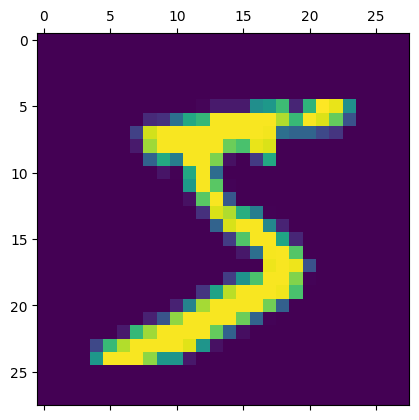

In [23]:
plt.matshow(X_train[0].reshape(28, 28))
plt.show()

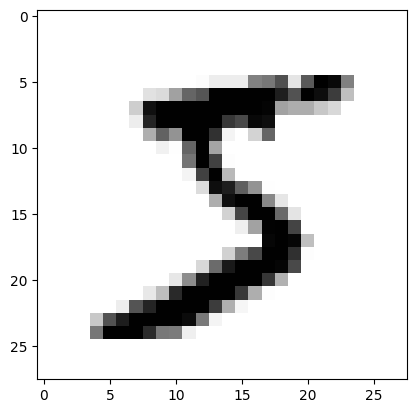

In [24]:
plt.imshow(X_train[0].reshape(28, 28), cmap = mpl.cm.binary, interpolation = 'nearest')
plt.show()

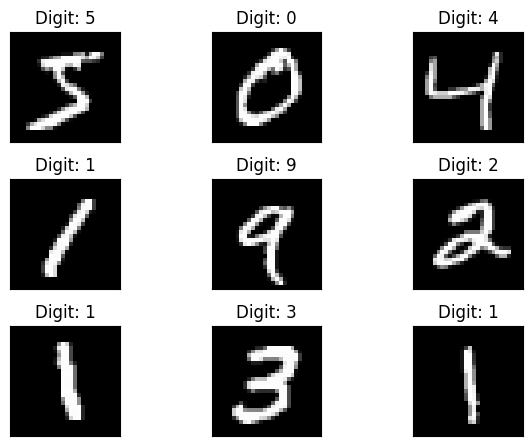

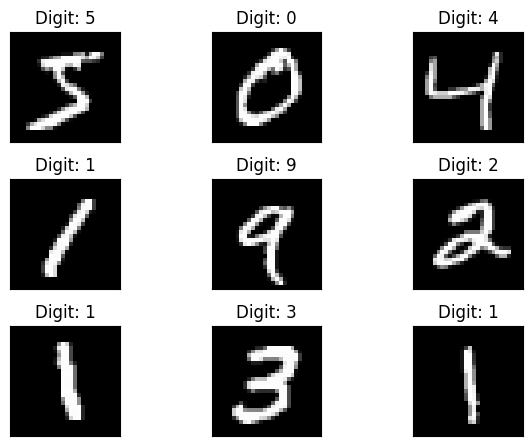

In [25]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i].reshape(28, 28), cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

# Target Variable.

In [26]:
y_train[0], type(y_train[0])

(5, numpy.uint8)

In [27]:
target_df = pd.DataFrame(y_train, columns = ['Label'])
target_df.head()

,Label
0,5
1,0
2,4
3,1
4,9


In [28]:
target_df.value_counts()

Label
1        6742
7        6265
3        6131
2        5958
9        5949
0        5923
6        5918
8        5851
4        5842
5        5421
dtype: int64

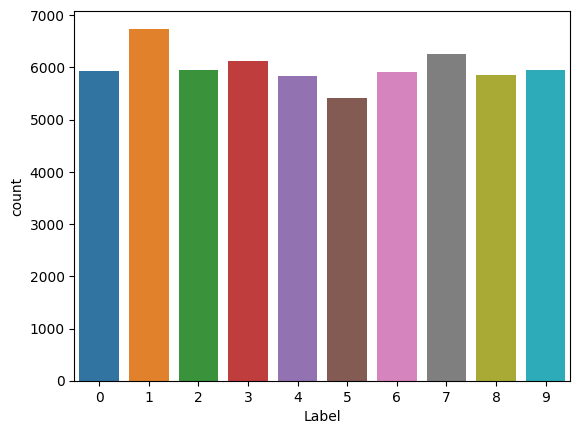

In [29]:
sns.countplot(data = target_df, x = 'Label')
plt.show()

In [30]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train_ = np_utils.to_categorical(y_train, n_classes)
Y_test_ = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train_.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [31]:
y_train[0], type(y_train[0])

(5, numpy.uint8)

# Neural network.

In [32]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [33]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [34]:
history = model.fit(X_train, Y_train_,
            batch_size=128, epochs=20,
            verbose=2,
            validation_data=(X_test, Y_test_))

Epoch 1/20
469/469 - 14s - loss: 0.2503 - accuracy: 0.9245 - val_loss: 0.1005 - val_accuracy: 0.9702 - 14s/epoch - 31ms/step
Epoch 2/20
469/469 - 9s - loss: 0.1007 - accuracy: 0.9694 - val_loss: 0.0792 - val_accuracy: 0.9747 - 9s/epoch - 20ms/step
Epoch 3/20
469/469 - 9s - loss: 0.0729 - accuracy: 0.9773 - val_loss: 0.0734 - val_accuracy: 0.9772 - 9s/epoch - 19ms/step
Epoch 4/20
469/469 - 9s - loss: 0.0560 - accuracy: 0.9826 - val_loss: 0.0702 - val_accuracy: 0.9777 - 9s/epoch - 19ms/step
Epoch 5/20
469/469 - 10s - loss: 0.0446 - accuracy: 0.9857 - val_loss: 0.0780 - val_accuracy: 0.9763 - 10s/epoch - 20ms/step
Epoch 6/20
469/469 - 10s - loss: 0.0407 - accuracy: 0.9863 - val_loss: 0.0726 - val_accuracy: 0.9793 - 10s/epoch - 21ms/step
Epoch 7/20
469/469 - 9s - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0620 - val_accuracy: 0.9819 - 9s/epoch - 18ms/step
Epoch 8/20
469/469 - 9s - loss: 0.0308 - accuracy: 0.9893 - val_loss: 0.0771 - val_accuracy: 0.9790 - 9s/epoch - 20ms/step
Epoch 9/20

## Accuracy and Loss.

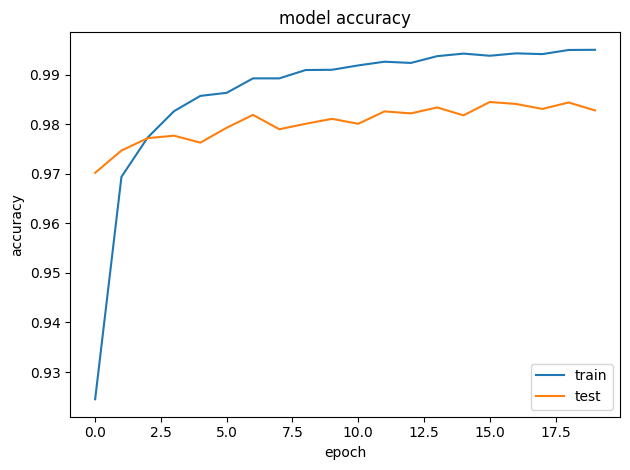

In [35]:
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.tight_layout()
plt.show()

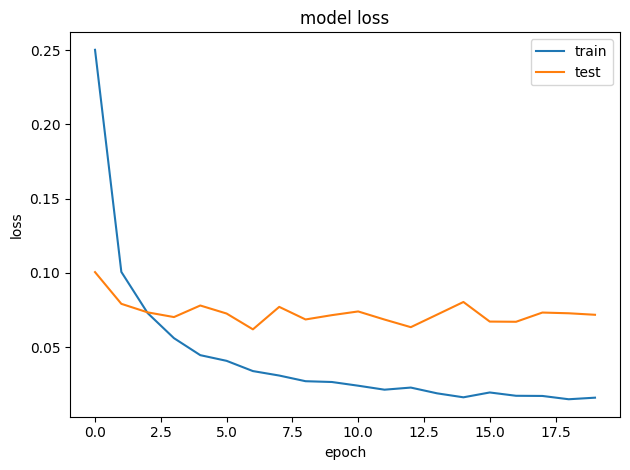

In [36]:
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
plt.show()

# Image agumentation.

In [37]:
# Method to shift the image by given dimension
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


# Creating Augmented Dataset
X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
     for image, label in zip(X_train, y_train):
             X_train_augmented.append(shift_image(image, dx, dy))
             y_train_augmented.append(label)


# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

In [38]:
X_train_augmented.shape, y_train_augmented.shape

((300000, 784), (300000,))

In [39]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train_augmented.shape)
y_train_augmented = np_utils.to_categorical(y_train_augmented, n_classes)
print("Shape after one-hot encoding: ", y_train_augmented.shape)

Shape before one-hot encoding:  (300000,)
Shape after one-hot encoding:  (300000, 10)


In [41]:
history = model.fit(X_train_augmented, y_train_augmented,
            batch_size=128, epochs=20,
            verbose=2,
            validation_data=(X_test, Y_test_))

Epoch 1/20
2344/2344 - 45s - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0413 - val_accuracy: 0.9868 - 45s/epoch - 19ms/step
Epoch 2/20
2344/2344 - 45s - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.0398 - val_accuracy: 0.9879 - 45s/epoch - 19ms/step
Epoch 3/20
2344/2344 - 43s - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0424 - val_accuracy: 0.9878 - 43s/epoch - 19ms/step
Epoch 4/20
2344/2344 - 44s - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0401 - val_accuracy: 0.9891 - 44s/epoch - 19ms/step
Epoch 5/20
2344/2344 - 45s - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0447 - val_accuracy: 0.9874 - 45s/epoch - 19ms/step
Epoch 6/20
2344/2344 - 45s - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0407 - val_accuracy: 0.9893 - 45s/epoch - 19ms/step
Epoch 7/20
2344/2344 - 44s - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0441 - val_accuracy: 0.9894 - 44s/epoch - 19ms/step
Epoch 8/20
2344/2344 - 44s - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0427 - val_accuracy: 0.9895 - 44s/ep

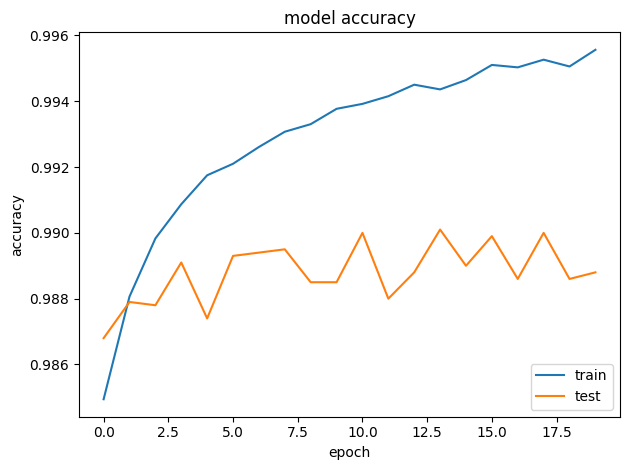

In [42]:
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.tight_layout()
plt.show()

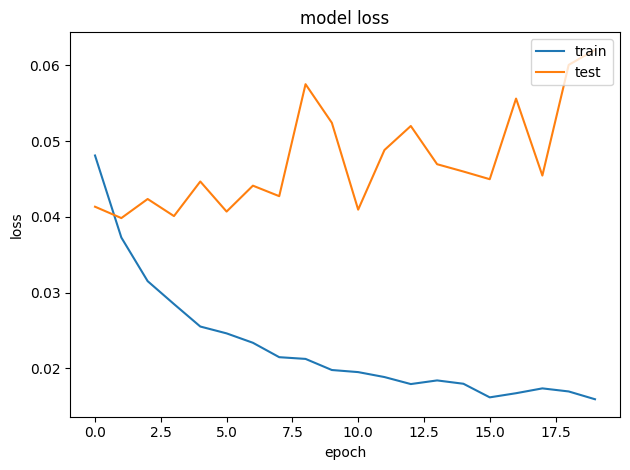

In [43]:
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
plt.show()